In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats, integrate
import os

In [2]:
import time
t0 = time.perf_counter()

# Global parameters

In [3]:
detect = ['index', 'DAQ', ''] 
detect[2] = 'SiPM' # SiPM
# detect[2] = 'PMT' # PMT

ch = 2

# Data

In [96]:
filename = []

path = '/home/investigator/mariandbt/python/data/'
path = path + '20230308/'

filename.append(os.path.join(path, 'dark_rate_bias_52.1V_dig2-192.168.0.254-17.txt')) 
filename.append(os.path.join(path, 'dark_rate_bias_52.5V_dig2-192.168.0.254-15.txt')) 
filename.append(os.path.join(path, 'dark_rate_bias_52.8V_dig2-192.168.0.254-14.txt')) 
filename.append(os.path.join(path, 'dark_rate_bias_53.1V_dig2-192.168.0.254-13.txt')) 
filename.append(os.path.join(path, 'dark_rate_bias_53.5V_dig2-192.168.0.254-11.txt')) 
filename.append(os.path.join(path, 'dark_rate_bias_53.8V_dig2-192.168.0.254-07.txt')) 
filename.append(os.path.join(path, 'dark_rate_bias_54.1V_dig2-192.168.0.254-06.txt')) 
filename.append(os.path.join(path, 'dark_rate_bias_54.5V_dig2-192.168.0.254-05.txt')) 
filename.append(os.path.join(path, 'dark_rate_bias_54.8V_dig2-192.168.0.254-04.txt')) 
filename.append(os.path.join(path, 'dark_rate_bias_55.1V_dig2-192.168.0.254-03.txt')) 

bias_voltage = np.array([52.1, 52.5, 52.8,
                         53.1, 53.5, 53.8,
                         54.1, 54.5, 54.8,
                         55.1
                        ])

# Fixed bias voltage waveform

### Data (1 file)

In [16]:
data = []
time_bin = -1.
with open(filename[1],'r', encoding='ascii') as fp:
    for i, line in enumerate(fp):
        if (time_bin < 0.) & (any(c == '=' for c in line)):
            print('Time bin = ', line.split(' = ')[:][1])
            time_bin = float(line.split(' = ')[:][1].split(' ')[0])
        if any(c.isalpha() for c in line) == False:
            data.append(np.asarray(line.split('\t')[:-1], dtype=float))
fp.close()

waveform = np.array(data)


n_points = int(waveform[:, 0].max() + 1)
n_frames = int(len(waveform)/n_points) 

waveform[:, 0] = waveform[:, 0]*time_bin


Time bin =  0.008 us



### RAW Waveform peak identification

In [88]:
frame_ref = int(n_frames/2); 
frame_ref = 1888; 
frame_ref = 2310; 
# frame_ref = n_frames - 1; 
# frame_ref = 1; 

frame = frame_ref;
# print('frame = ', frame)

n_peaks =  3


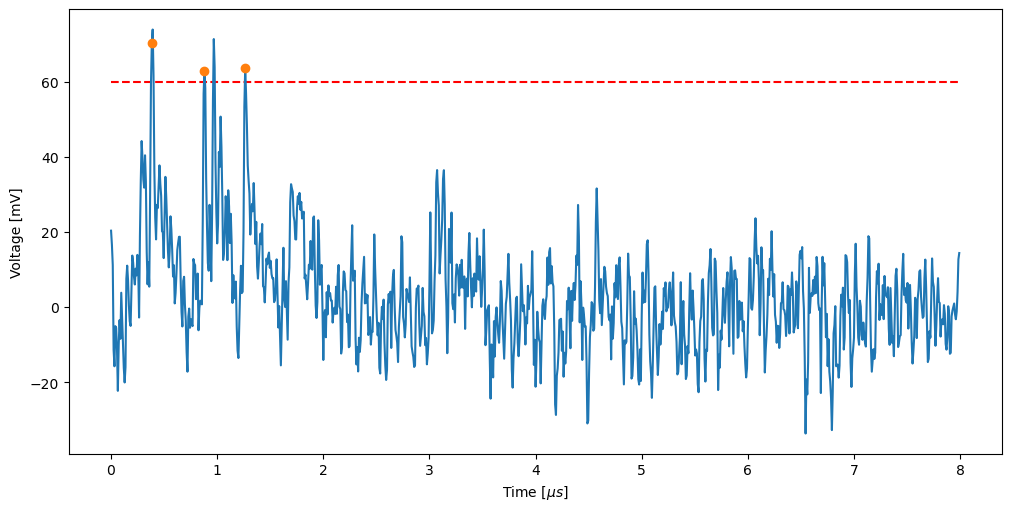

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), constrained_layout=True)

wave = waveform[frame*n_points: (frame + 1)*n_points].copy()
x_ax = wave[:, 0]

prev = wave[:, ch][0] or 0.001 # this takes the second option if the first one is == 0 to avoid dividing by 0.
peaks = []

th = 60. # threshold to which consider a peak

dy = 0.05 # we ask for this relative difference between two points to consider a peak
dx = 20 
"""we ask that the peaks are separated in time by at least this amount of points, 
to avoid counting twice the same peak"""
x_prev = -dist

n_peaks = 0

for index, value in enumerate(wave[:, ch][1:], 1):
    if (((value - prev) / prev > dif) & 
        (value >= th) &
        (np.fabs(index - x_prev) >= dx) 
       ):
        
        peaks.append(index)
        n_peaks += 1
        x_prev = peaks[-1] or (-dist)
    prev = value or 0.001

print('n_peaks = ', n_peaks)


#_________plot_settings_________________________________________________
ax.plot(x_ax, th*np.ones(len(x_ax)), '--r')
ax.plot(x_ax, wave[:, ch], label = detect[ch])
ax.plot(x_ax[peaks], wave[:, ch][peaks], 'o')

ax.set_ylabel('Voltage [mV]');
ax.set_xlabel('Time [$\mu s$]');

### Dark rate count

In [90]:
th = 60. # threshold to which consider a peak

dy = 0.05 # we ask for this relative difference between two points to consider a peak
dx = 20 
"""we ask that the peaks are separated in time by at least this amount of points, 
to avoid counting twice the same peak"""

n_peaks_per_sec = []

for frame in range(n_frames):
    wave = waveform[frame*n_points: (frame + 1)*n_points].copy()
    x_ax = wave[:, 0]

    prev = wave[:, ch][0] or 0.001 # this takes the second option if the first one is == 0 to avoid dividing by 0.
    peaks = []
    
    x_prev = -dist

    n_peaks = 0

    for index, value in enumerate(wave[:, ch][1:], 1):
        if (((value - prev) / prev > dif) & 
            (value >= th) &
            (np.fabs(index - x_prev) >= dx) 
           ):

            peaks.append(index)
            n_peaks += 1
            x_prev = peaks[-1] or (-dist)
        prev = value or 0.001
        
    n_peaks_per_sec.append(n_peaks/(x_ax.max()*1e-6))
    

#     print('n_peaks = ', n_peaks, '; frame = ', frame)


In [94]:
np.mean(n_peaks_per_sec)

41742.87328409193

# All bias voltages waveform

### Data (all files)

In [99]:
dark_rate = []

In [100]:
for i in range(len(filename)):
    data = []
    time_bin = -1.
    with open(filename[i],'r', encoding='ascii') as fp:
        for i, line in enumerate(fp):
            if (time_bin < 0.) & (any(c == '=' for c in line)):
#                 print('Time bin = ', line.split(' = ')[:][1])
                time_bin = float(line.split(' = ')[:][1].split(' ')[0])
            if any(c.isalpha() for c in line) == False:
                data.append(np.asarray(line.split('\t')[:-1], dtype=float))
    fp.close()

    waveform = np.array(data)


    n_points = int(waveform[:, 0].max() + 1)
    n_frames = int(len(waveform)/n_points) 

    waveform[:, 0] = waveform[:, 0]*time_bin


    th = 60. # threshold to which consider a peak

    dy = 0.05 # we ask for this relative difference between two points to consider a peak
    dx = 20 
    """we ask that the peaks are separated in time by at least this amount of points, 
    to avoid counting twice the same peak"""

    n_peaks_per_sec = []

    for frame in range(n_frames):
        wave = waveform[frame*n_points: (frame + 1)*n_points].copy()
        x_ax = wave[:, 0]

        prev = wave[:, ch][0] or 0.001 # this takes the second option if the first one is == 0 to avoid dividing by 0.
        peaks = []

        x_prev = -dist

        n_peaks = 0

        for index, value in enumerate(wave[:, ch][1:], 1):
            if (((value - prev) / prev > dif) & 
                (value >= th) &
                (np.fabs(index - x_prev) >= dx) 
               ):

                peaks.append(index)
                n_peaks += 1
                x_prev = peaks[-1] or (-dist)
            prev = value or 0.001

        n_peaks_per_sec.append(n_peaks/(x_ax.max()*1e-6))


    #     print('n_peaks = ', n_peaks, '; frame = ', frame)


    dark_rate.append(np.mean(n_peaks_per_sec))
    dark_rate_std.append(np.std(n_peaks_per_sec))


In [105]:
np.std(dark_rate)

402307.20953012654

# Dark rate vs bias Voltage

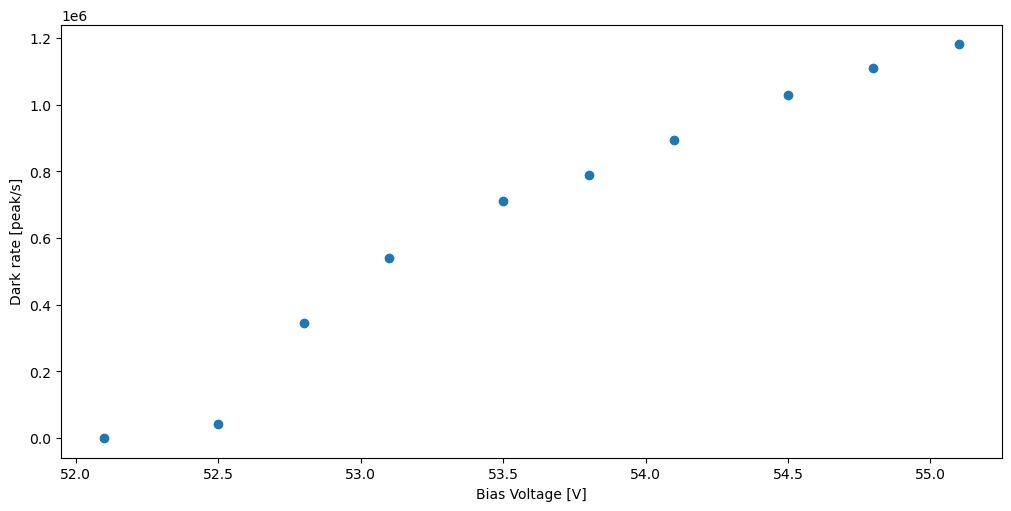

In [107]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), constrained_layout=True)

x_ax = bias_voltage
y_ax = dark_rate

#_________plot_settings_________________________________________________
ax.plot(x_ax, y_ax, 'o')

ax.set_xlabel('Bias Voltage [V]');
ax.set_ylabel('Dark rate [peak/s]');

# Timer

In [ ]:
tf = time.perf_counter()
print('Code timer: %.2f'%(tf-t0))